### Public data

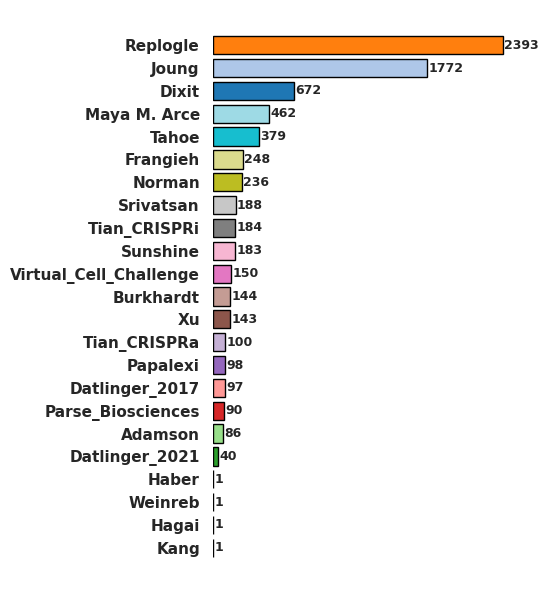

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

data = {
    "Source_paper": [
        "Datlinger_2017", "Datlinger_2021", "Adamson", "Joung", "Frangieh", "Papalexi",
        "Replogle", "Tian_CRISPRi", "Tian_CRISPRa","Xu","Virtual_Cell_Challenge", "Dixit", "Norman", "Sunshine", "Maya M. Arce",
        "Kang", "Haber", "Weinreb", "Hagai", "Srivatsan", "Burkhardt", "Tahoe","Parse_Biosciences"
    ],
    "No_of_perturbations": [
        97, 40, 86, 1772, 248, 98, 2393, 184, 100,143,150, 672, 236, 183, 462, 1, 1, 1, 1, 188, 144, 379, 90
    ]
}

df = pd.DataFrame(data)


df_summary = df.rename(columns={"No_of_perturbations": "total_perturbations"})
df_summary = df_summary.sort_values(by="total_perturbations", ascending=True)


colors = sns.color_palette("tab20", n_colors=len(df_summary))


sns.set(style="whitegrid")
rcParams['pdf.fonttype'] = 42
rcParams['font.size'] = 9

plt.figure(figsize=(5.5, 6))
bars = plt.barh(
    df_summary["Source_paper"],
    df_summary["total_perturbations"],
    color=colors,  
    edgecolor="black"
)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             str(int(width)),
             va='center', ha='left', fontsize=9, fontweight='bold')


plt.xlabel("")
plt.ylabel("")
plt.yticks(fontsize=11, fontweight='bold')
plt.title("", fontsize=12, fontweight='bold')
plt.grid(False)
plt.xticks([]) 

ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


### cell line/cell type

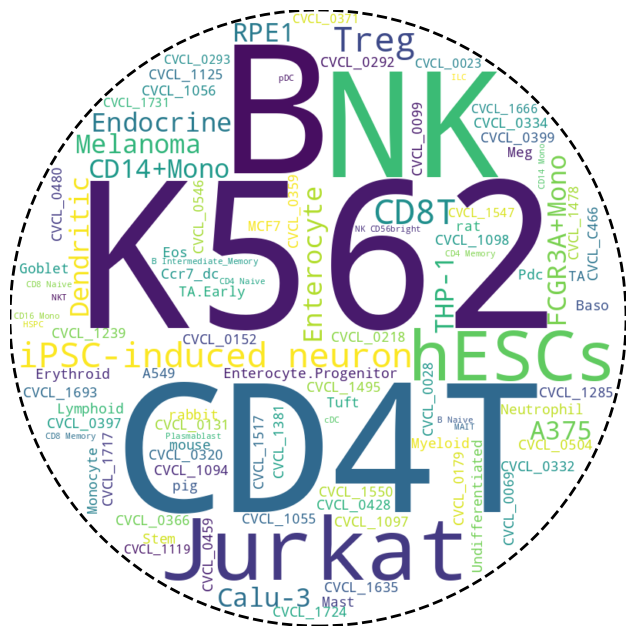

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

data = {
    "Data name": [
        "Datlinger", "Datlinger", "Adamson", "Joung", "Frangieh", "Papalexi",
        "Replogle", "Tian", "Tian","Xu", "Virtual Cell Challenge","Dixit", "Norman", "Sunshine", "Maya M. Arce",
        "Kang", "Haber", "Weinreb", "Hagai", "Srivatsan", "Burkhardt", "Tahoe",
        "Parse Biosciences"
    ],
    "Cell type (cell line)": [
        "Jurkat",
        "Jurkat",
        "K562",
        "hESCs",
        "Melanoma",
        "THP-1",
        "RPE1",
        "iPSC-induced neuron",
        "iPSC-induced neuron",
        "A375",
        "hESCs",
        "K562",
        "K562",
        "Calu-3",
        "CD4T",
        "B/CD14+Mono/CD4T/CD8T/Dendritic/FCGR3A+Mono/NK",
        "Endocrine/Enterocyte/Enterocyte.Progenitor/Goblet/Stem/TA/TA.Early/Tuft",
        "Baso/Ccr7_dc/Eos/Erythroid/Lymphoid/Mast/Meg/Monocyte/Neutrophil/B/Pdc/Undifferentiated",
        "mouse/pig/rabbit/rat",
        "MCF7/A549/K562",
        "CD4T/CD8T/Treg/B/Myeloid/NK",
        "CVCL_1125/CVCL_0292/CVCL_1693/CVCL_0099/CVCL_1717/CVCL_1055/CVCL_1550/CVCL_1097/CVCL_0334/CVCL_1056/CVCL_1098/CVCL_1635/CVCL_0366/CVCL_0504/CVCL_1239/CVCL_0131/CVCL_1285/CVCL_0332/CVCL_1724/CVCL_1094/CVCL_0397/CVCL_0320/CVCL_0152/CVCL_1478/CVCL_0399/CVCL_0218/CVCL_1495/CVCL_0428/CVCL_1517/CVCL_0480/CVCL_C466/CVCL_0028/CVCL_1381/CVCL_0546/CVCL_0459/CVCL_0179/CVCL_0069/CVCL_0359/CVCL_1731/CVCL_0293/CVCL_0371/CVCL_0023/CVCL_1547/CVCL_1666/CVCL_1119",
        "B Intermediate_Memory/ B Naive/ CD14 Mono/ CD16 Mono/ CD4 Memory/ CD4 Naive/ CD8 Memory/ CD8 Naive/ HSPC/ ILC/ MAIT/ NK/ NK CD56bright/ NKT/ Plasmablast/ Treg/ cDC/ pDC"
    ]
}


df = pd.DataFrame(data)

all_cell_lines = []
for cell_line_str in df["Cell type (cell line)"]:
    parts = cell_line_str.split('/')
    all_cell_lines.extend([p.strip() for p in parts if p.strip()])


counter = Counter(all_cell_lines)
freq_dict = dict(counter)


def create_circle_mask(diameter=800):
    radius = diameter // 2
    y, x = np.ogrid[:diameter, :diameter]
    center = (radius, radius)
    mask = (x - center[0])**2 + (y - center[1])**2 > radius**2
    mask = 255 * mask.astype(int) 
    return mask

circle_mask = create_circle_mask(800)

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    mask=circle_mask,
    random_state=6666
).generate_from_frequencies(freq_dict)


plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

circle = plt.Circle(
    (0.5, 0.5), 0.5,  # (x, y), radius
    transform=plt.gca().transAxes, 
    color='black',  
    fill=False,  
    linestyle='--', 
    linewidth=2  
)
plt.gca().add_artist(circle)


plt.title('', fontsize=20)
plt.show()


### Perturb_KHP dataset cell type

In [3]:
import scanpy as sc
import plotly.express as px
import pandas as pd
adata = sc.read("/data2/lanxiang/data/Task3_data/Perturb_KHP_sub10.h5ad")
counts = adata.obs["cell_type"].value_counts()
df = counts.reset_index()
df.columns = ['cell_type', 'count']

order = ['K562', 'HDFs', 'CD4T', 'CD8T', 'B', 'Mast', 'DC', 'Monocyte', 'Erythrocytes', 'Macrophage']
df['cell_type'] = pd.Categorical(df['cell_type'], categories=order, ordered=True)
df = df.sort_values('cell_type')

color_sequence = px.colors.qualitative.Set3

fig = px.pie(
    df,
    values='count',
    names='cell_type',
    title='',
    color='cell_type',
    color_discrete_sequence=color_sequence,
    hole=0,
)

fig.update_traces(
    textinfo='label',
    textposition='auto',
    marker=dict(line=dict(color='black', width=1)),
    textfont=dict(
        size=16,
        color='black',
        family='Arial Black',
    ),
    insidetextorientation='radial',
)

fig.update_layout(showlegend=False)

fig.show()


/home/lanxiang/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


### Perturb_cmo_V1 dataset cell type

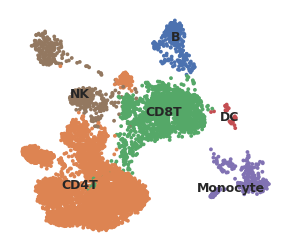

In [4]:
import matplotlib.pyplot as plt
import scanpy as sc
adata = sc.read("/data2/lanxiang/data/Task3_data/Perturb_cmo_V1_sub10.h5ad")
sc.pl.umap(
    adata,
    color="cell_type",
    size=30,
    frameon=False,
    legend_loc='on data',
    title='',
    show=False  
)

fig = plt.gcf()
fig.set_size_inches(3.5, 3)

plt.show()


### dataset number of DEG

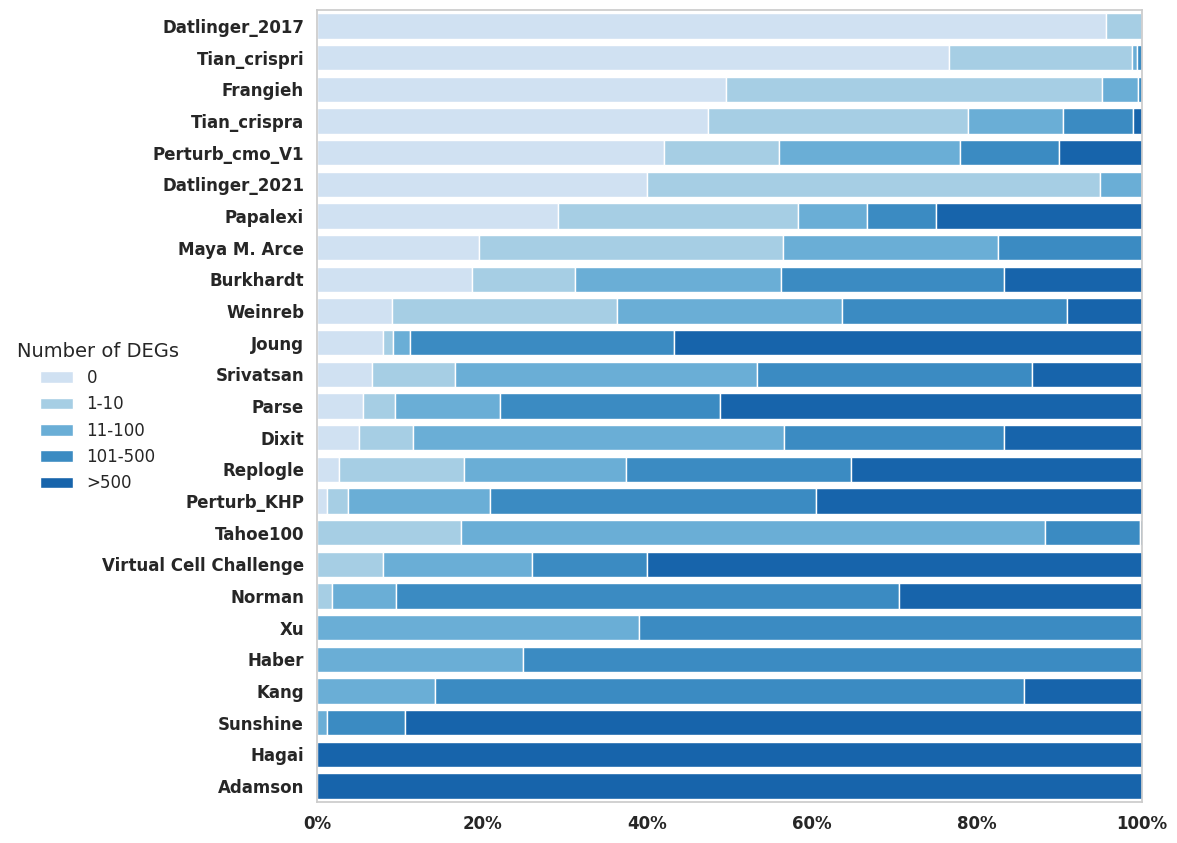

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

TASK1_DATASETS = {
    "Arce_MM_CRISPRi_sub": "Maya M. Arce",
    "Adamson": "Adamson",
    "DatlingerBock2017": "Datlinger_2017",
    "DatlingerBock2021": "Datlinger_2021",
    'DixitRegev2016': 'Dixit',
    "FrangiehIzar2021_RNA": "Frangieh",
    'NormanWeissman2019_filtered': 'Norman',
    "PapalexiSatija2021_eccite_RNA": "Papalexi",
    "ReplogleWeissman2022_rpe1": "Replogle",
    'Sunshine2023_CRISPRi_sarscov2': 'Sunshine',
    "TianKampmann2021_CRISPRa": "Tian_crispra",
    "TianKampmann2021_CRISPRi": "Tian_crispri",
    "vcc_train_filtered": "Virtual Cell Challenge",
    "Junyue_Cao": "Xu",
    "Fengzhang2023": "Joung"
}

TASK3_DATASETS = {
    "Kang": "Kang",
    "Haber": "Haber",
    "Hagai": "Hagai",
    "Weinreb_time": "Weinreb",
    "Burkhardt_sub10": "Burkhardt",
    "Srivatsan_sciplex3_sub10": "Srivatsan",
    "Perturb_KHP_sub10": "Perturb_KHP",
    "Perturb_cmo_V1_sub10": "Perturb_cmo_V1",
    "Tahoe100_sub10": "Tahoe100",
    "Parse_10M_PBMC_sub10": "Parse"
}

all_datasets = {**TASK1_DATASETS, **TASK3_DATASETS}

# Read the data
df = pd.read_csv('/home/yunlin/projects/perturb_model/lanxiang_model/model_check/dataset_summary/deg_count_summary_statistics.csv')

# Remove the "All Datasets" row for the plot
df_plot = df[df['category'] != 'All Datasets'].copy()
df_plot['mapped_category'] = df_plot['category'].map(all_datasets).fillna(df_plot['category'])

# Sort by multiple columns: first by 0_pct, then by 1-10_pct, then by 101-500_pct
df_plot = df_plot.sort_values(['0_pct', '1-10_pct', '11-100_pct'], ascending=True)

# Extract percentage columns (excluding <0_pct)
pct_cols = ['0_pct', '1-10_pct', '11-100_pct', '101-500_pct', '>500_pct']
categories = df_plot['mapped_category']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, len(categories) * 0.3 + 1))

# Colors for each percentage category
colors = plt.cm.Blues(np.linspace(0.2, 0.8, 5))


# Create the stacked horizontal bar chart
left = np.zeros(len(categories))
bar_height = 0.8

for i, col in enumerate(pct_cols):
    values = df_plot[col].values
    bars = ax.barh(categories, values, left=left, color=colors[i], 
                   label=col.replace('_pct', ''), height=bar_height)
    left += values

# Customize the plot
ax.set_xlabel('', fontsize=16, fontweight='bold')
ax.set_ylabel('', fontsize=16, fontweight='bold')
ax.tick_params(axis='y', labelsize=13)
ax.set_title('', fontsize=20, fontweight='bold')

# Add legend without a frame
legend_labels = ['0', '1-10', '11-100', '101-500', '>500']
ax.legend(labels=legend_labels, bbox_to_anchor=(-0.15, 0.6), loc='upper right', 
          prop={'size': 12}, title='Number of DEGs', title_fontsize=14, frameon=False)

ax.set_xlim(0, 100)

# Adjust y-axis limits to reduce spacing
ax.set_ylim(-0.5, len(categories) - 0.5)

# Format x-axis to show percentage signs
ax.set_xticks(np.arange(0, 101, 20))
ax.set_xticklabels([f'{x}%' for x in np.arange(0, 101, 20)])

plt.grid(False)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

# Adjust layout to prevent legend cutoff
plt.tight_layout()

plt.show()


### median number of DEGs per condition versus the log number of cells

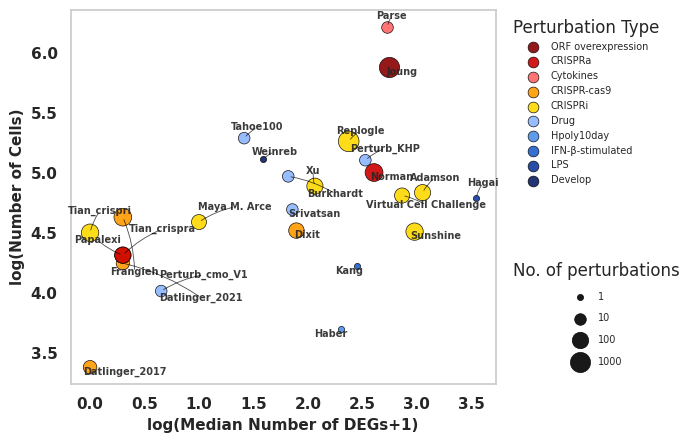

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['ps.fonttype'] = 42   

# Read the data
table1 = pd.read_csv('/home/yunlin/projects/perturb_model/lanxiang_model/model_check/dataset_summary/Table 1.csv')
deg_summary = pd.read_csv('/home/yunlin/projects/perturb_model/lanxiang_model/model_check/de_method_comparison/DEG_abs_score_sorted/DEG_summary.csv')

# Clean the dataset names in table1 (remove .h5ad extension for matching)
table1['dataset_name'] = table1['Data name'].str.replace('.h5ad', '')

# Drop existing median_degs and mean_degs columns if they exist
if 'median_degs' in table1.columns:
    table1 = table1.drop(['median_degs', 'mean_degs'], axis=1)

# Calculate median and mean DEGs per dataset
deg_stats = deg_summary.groupby('dataset')['total_significant_degs'].agg(['median', 'median']).reset_index()
deg_stats.columns = ['deg_dataset_name', 'median_degs', 'mean_degs']

# Create mapping for mismatched dataset names
dataset_mapping = {
    'Arce_MM_CRISPRi': 'Arce_MM_CRISPRi_sub',
    'Weinreb': 'Weinreb_time'
}

# Apply mapping to table1 dataset names for merging
table1['deg_dataset_name'] = table1['dataset_name'].map(dataset_mapping).fillna(table1['dataset_name'])

# Merge with table1
merged_data = table1.merge(deg_stats, on='deg_dataset_name', how='left')

# Extract number of cells from the 'Sub_n_obs × n_vars' column
merged_data['n_cells'] = merged_data['Sub_n_obs × n_vars'].str.split(' × ').str[0].str.replace(',', '').astype(float)

# Extract number of perturbations
merged_data['n_perturbations'] = merged_data['Sub_No. of perturbations']

# Create the scatterplot
plt.figure(figsize=(7, 4.5))  # Changed from (12, 8) to match second code

# Create a color map for perturbation types based on strength
# Keep original colors from first code
color_map = {
    'ORF overexpression': '#8B0000',  
    'CRISPRa': '#CC0000',          
    'Cytokines': '#FF6666',      
    'CRISPR-cas9': '#FF9900',      
    'CRISPRi': '#FFD900',          
    'Drug': '#8CB6FF',           
    'Hpoly10day': '#4F8FEA',        
    'IFN-β-stimulated': '#1F5FCC', 
    'LPS': '#123A9E',           
    'Develop': '#0A1F66',        
}

# Dataset name mapping
DATASET_NAME_MAP = {
    "Arce_MM_CRISPRi_sub": "Maya M. Arce",
    "Adamson": "Adamson",
    "DatlingerBock2017": "Datlinger_2017",
    "DatlingerBock2021": "Datlinger_2021",
    'DixitRegev2016': 'Dixit',
    "FrangiehIzar2021_RNA": "Frangieh",
    'NormanWeissman2019_filtered': 'Norman',
    "PapalexiSatija2021_eccite_RNA": "Papalexi",
    "ReplogleWeissman2022_rpe1": "Replogle",
    'Sunshine2023_CRISPRi_sarscov2': 'Sunshine',
    "TianKampmann2021_CRISPRa": "Tian_crispra",
    "TianKampmann2021_CRISPRi": "Tian_crispri",
    "vcc_train_filtered": "Virtual Cell Challenge",
    "Junyue_Cao": "Xu",
    "Fengzhang2023": "Joung",
    "Kang": "Kang",
    "Haber": "Haber",
    "Hagai": "Hagai",
    "Weinreb_time": "Weinreb",
    "Burkhardt_sub10": "Burkhardt",
    "Srivatsan_sciplex3_sub10": "Srivatsan",
    "Perturb_KHP_sub10": "Perturb_KHP",
    "Perturb_cmo_V1_sub10": "Perturb_cmo_V1",
    "Tahoe100_sub10": "Tahoe100",
    "Parse_10M_PBMC_sub10": "Parse"
}

# Store scatter points for reference
scatter_points = []
texts = []

# Create scatter plot
for ptype in merged_data['Sub_Perturbation type'].unique():
    if pd.isna(ptype):
        continue
        
    mask = merged_data['Sub_Perturbation type'] == ptype
    subset = merged_data[mask]
    
    if len(subset) > 0 and not subset['median_degs'].isna().all():
        # Use predefined color if available, otherwise use gray
        color = color_map.get(ptype, '#808080')
        
        scatter = plt.scatter(
            np.log10(subset['median_degs']+1),  # Keep +1 from first code
            np.log10(subset['n_cells']),
            c=color, 
            s=np.maximum(np.log10(subset['n_perturbations']) * 70, 20),  # Size based on log(n_perturbations), minimum 20
            label=ptype,
            alpha=0.9,
            edgecolors='black',
            linewidth=0.5
        )
        
        # Store scatter points and create text labels
        for i, (idx, row) in enumerate(subset.iterrows()):
            if not pd.isna(row['median_degs']+1):
                dataset_label = DATASET_NAME_MAP.get(row['deg_dataset_name'], row['deg_dataset_name'])
                x_pos = np.log10(row['median_degs']+1)  # Keep +1 from first code
                y_pos = np.log10(row['n_cells'])
                
                # Store the actual scatter point position
                scatter_points.append((x_pos, y_pos))
                
                # Create text with initial position slightly offset
                text = plt.text(x_pos, y_pos, dataset_label, 
                               fontsize=7, fontweight='bold', alpha=0.9,
                               ha='center', va='center')
                texts.append(text)

# Use adjust_text with more aggressive settings to ensure all labels are separated
# and all have arrows
adjust_text(texts,
           x=[point[0] for point in scatter_points],
           y=[point[1] for point in scatter_points],
           arrowprops=dict(arrowstyle='-', color='black', alpha=0.7, lw=0.6,
                          connectionstyle="arc3,rad=0.1"),  # Slight curve to arrows
           expand_points=(4.0, 4.0),    # Larger expansion around points
           expand_text=(3.5, 3.5),     # Larger expansion around text
           force_points=6.0,           # Stronger repulsion from points
           force_text=7.0,             # Stronger repulsion between texts
           force_objects=6.0,          # Repulsion from other plot objects
           lim=1000,                   # More iterations for better placement
           precision=0.01,             # Higher precision
           only_move={'points':'', 'text':'xy'},  # Allow text to move in both directions
           avoid_points=True,          # Avoid overlapping with scatter points
           avoid_self=True)            # Avoid self-intersection

# Set axis labels with consistent font size and weight
plt.xlabel('log(Median Number of DEGs+1)', fontsize=11, fontweight='bold')
plt.ylabel('log(Number of Cells)', fontsize=11, fontweight='bold')
plt.title('')  # Remove title like second code

# Create color legend for perturbation types ordered by strength (red to blue)
perturbation_order = ['ORF overexpression', 'CRISPRa', 'Cytokines', 'CRISPR-cas9', 'CRISPRi', 'Drug', 'Hpoly10day', 'IFN-β-stimulated', 'LPS', 'Develop']
color_legend_handles = []
color_legend_labels = []

for ptype in perturbation_order:
    if ptype in merged_data['Sub_Perturbation type'].values:
        color = color_map.get(ptype, '#808080')
        handle = plt.scatter([], [], c=color, s=60, alpha=0.9, edgecolors='black', linewidth=0.5)
        color_legend_handles.append(handle)
        color_legend_labels.append(ptype)

# Create legends without frames
color_legend = plt.legend(handles=color_legend_handles, labels=color_legend_labels,
                         bbox_to_anchor=(1.02, 1), loc='upper left', title='Perturbation Type',
                         frameon=False, fontsize=7)
plt.gca().add_artist(color_legend)

# Create size legend for number of perturbations (positioned lower)
size_values = [1, 10, 100, 1000]
size_legend_elements = []
for val in size_values:
    size = max(np.log10(val) * 70, 20)  # Same formula as in scatter plot
    size_legend_elements.append(plt.scatter([], [], s=size, c='black', alpha=0.9, 
                                          edgecolors='black', linewidth=0.5, 
                                          label=f'{val}'))

size_legend = plt.legend(handles=size_legend_elements, 
                        bbox_to_anchor=(1.02, 0.35), loc='upper left', 
                        title='No. of perturbations', labelspacing=1.2,
                        frameon=False, fontsize=7)

plt.grid(False)  # Changed from grid(True) to grid(False)
plt.tight_layout()
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

# Save the plot
plt.show()
